In [678]:
import pandas as pd
import numpy as np
from scipy import stats
from statistics import stdev
from sklearn import decomposition
from plotnine import *
import math
from collections import Counter

In [227]:
data=pd.read_excel('./Rice_Cammeo_Osmancik.xlsx')

In [228]:
data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


In [229]:
#split data to train and test sets:
training_data=data.sample(frac=0.8, random_state=25)
testing_data=data.drop(training_data.index)

In [230]:
training_data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
1184,16944,543.125977,236.125214,92.681030,0.919749,17189,0.651943,Cammeo
2207,11502,425.955994,173.273193,85.456192,0.869923,11776,0.637583,Osmancik
1655,11438,433.917999,178.351562,83.547653,0.883493,11767,0.743017,Osmancik
844,15307,489.471008,197.202652,100.132988,0.861494,15628,0.679104,Cammeo
340,15398,513.023010,214.054260,93.684486,0.899137,15936,0.695044,Cammeo
...,...,...,...,...,...,...,...,...
1135,12279,462.006012,197.846252,80.542061,0.913386,12619,0.636944,Cammeo
2983,10735,421.488007,172.779373,80.167381,0.885842,11021,0.780954,Osmancik
3802,12349,434.138000,180.241928,88.264580,0.871891,12526,0.627490,Osmancik
3458,12900,442.686005,181.080261,91.612076,0.862581,13112,0.787546,Osmancik


In [231]:
#Normalize the seven quantitative columns to a mean of 0 and standard deviation 1 for training dataset
for column in training_data:
    if column != 'Class':
        mean=training_data[column].mean()
        std=training_data[column].std()
        training_data[column]=((training_data[column]-mean)/std)

In [232]:
training_data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
1184,2.459139,2.484482,2.700673,1.109006,1.572849,2.373931,-0.131041,Cammeo
2207,-0.667926,-0.787640,-0.882024,-0.146599,-0.808914,-0.656380,-0.316696,Osmancik
1655,-0.704702,-0.565291,-0.592546,-0.478284,-0.160224,-0.661418,1.046427,Osmancik
844,1.518491,0.986098,0.482006,2.404081,-1.211814,1.500051,0.220114,Cammeo
340,1.570781,1.643818,1.442583,1.283396,0.587580,1.672475,0.426198,Cammeo
...,...,...,...,...,...,...,...,...
1135,-0.221449,0.219103,0.518692,-1.000626,1.268712,-0.184451,-0.324964,Cammeo
2983,-1.108657,-0.912415,-0.910173,-1.065741,-0.047953,-1.079044,1.536914,Osmancik
3802,-0.181226,-0.559147,-0.484791,0.341471,-0.714856,-0.236514,-0.447189,Osmancik
3458,0.135388,-0.320433,-0.437005,0.923232,-1.159899,0.091541,1.622131,Osmancik


In [233]:
#Normalize the seven quantitative columns to a mean of 0 and standard deviation 1 for testing dataset
for column in testing_data:
    if column != 'Class':
        test_mean=testing_data[column].mean()
        test_std=testing_data[column].std()
        testing_data[column]=((testing_data[column]-test_mean)/test_std)

In [234]:
testing_data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
10,1.321819,1.305255,1.367500,0.647305,0.912668,1.309812,-0.481223,Cammeo
11,1.143139,1.209196,0.915894,1.172118,0.183162,1.207529,-1.185934,Cammeo
14,0.481320,0.643280,0.799506,-0.171132,0.968913,0.477762,0.733200,Cammeo
20,0.728768,0.789369,0.852105,0.311615,0.702397,0.713356,-1.301531,Cammeo
22,0.409025,0.529527,0.646901,0.055553,0.693572,0.411681,1.736785,Cammeo
...,...,...,...,...,...,...,...,...
3786,-0.306868,-0.481360,-0.662309,0.392267,-0.992193,-0.339922,0.114289,Osmancik
3792,0.258559,0.063785,-0.403846,1.258462,-1.415435,0.299630,-0.442889,Osmancik
3793,-0.599573,-1.051216,-1.167658,0.454562,-1.797962,-0.660559,1.664716,Osmancik
3801,-1.220836,-1.295869,-0.971620,-1.322238,0.096381,-1.271955,-0.978186,Osmancik


In [235]:
pca = decomposition.PCA(n_components=2)
train_reduced = pca.fit_transform(training_data[['Area','Perimeter','Major_Axis_Length','Minor_Axis_Length','Eccentricity','Convex_Area','Extent']])
train_pc0 = train_reduced[:, 0]
train_pc1 = train_reduced[:, 1]

In [236]:
train_dataframe=pd.DataFrame()

In [237]:
train_dataframe['pc0']=train_pc0
train_dataframe['pc1']=train_pc1
train_dataframe['class']=training_data['Class'].tolist()

In [238]:
train_dataframe

,pc0,pc1,class
0,5.313444,-0.585576,Cammeo
1,-1.583359,0.401530,Osmancik
2,-1.411080,0.230734,Osmancik
3,2.548840,2.477719,Cammeo
4,3.425018,0.505584,Cammeo
...,...,...,...
3043,0.133728,-1.715685,Cammeo
3044,-2.286110,-0.001950,Osmancik
3045,-0.695297,0.579945,Osmancik
3046,-0.305306,2.069774,Osmancik


In [239]:
test_data_reduced=pca.transform(testing_data[['Area','Perimeter','Major_Axis_Length','Minor_Axis_Length','Eccentricity','Convex_Area','Extent']])
test_pc0 = test_data_reduced[:, 0]
test_pc1 = test_data_reduced[:, 1]

In [240]:
test_dataframe=pd.DataFrame()

In [246]:
test_dataframe['pc0']=test_pc0
test_dataframe['pc1']=test_pc1
test_dataframe['class']=testing_data['Class'].tolist()

In [631]:
test_dataframe

,pc0,pc1,class
0,2.876629,-0.467043,Cammeo
1,2.545471,0.110906,Cammeo
2,1.220150,-0.546549,Cammeo
3,1.751711,-0.845585,Cammeo
4,0.984674,0.178318,Cammeo
...,...,...,...
757,-0.925050,1.018055,Osmancik
758,0.215064,1.640277,Osmancik
759,-1.955953,2.258874,Osmancik
760,-2.529862,-1.226569,Osmancik


In [633]:
train_plot=(ggplot(train_dataframe, aes(x='pc0',y='pc1',color='class'))
                  +geom_point()
                  +theme_xkcd()
                 )

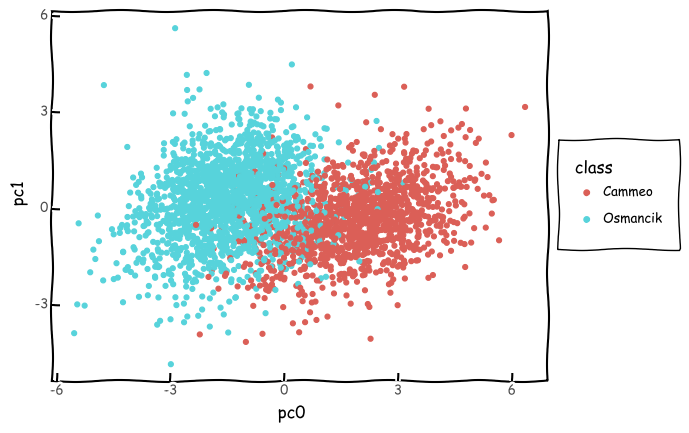

In [634]:
print(train_plot)

In [251]:
test_plot=(ggplot(test_dataframe, aes(x='pc0',y='pc1',color='class')) #scatter plot
 +geom_point()
 +theme_xkcd()
)

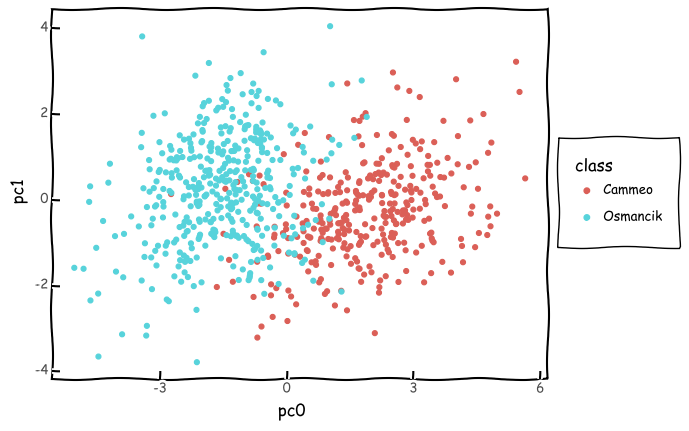

In [252]:
print(test_plot)

In [755]:
test_pts_list=[(x,y) for x,y in zip(test_dataframe['pc0'],test_dataframe['pc1'])] #list for test points coordinates

In [756]:
train_pts_list=[(x,y,z) for x,y,z in zip(train_dataframe['pc0'],train_dataframe['pc1'],train_dataframe['class'])] #list for train points coordinates

In [757]:
def get_data_in_range(data, bbox):
    result = []
    for x, y, condition in data:
        if bbox['xlo'] <= x < bbox['xhi'] and bbox['ylo'] <= y < bbox['yhi']: #so that the right side and top side do not get counted twice.
            result.append([x, y, condition])
    return result

In [766]:
class QuadTree:
    def __init__(self, data, bounding_box=None,k=1):
        if bounding_box is None:
            xs, ys, conditions = zip(*data)
            self.xlo = min(xs)
            self.ylo = min(ys)
            self.xhi = max(xs)
            self.yhi = max(ys)
            self.bound = [self.xlo,self.ylo,self.xhi,self.yhi]
        else:
            self.xlo = bounding_box['xlo']
            self.xhi = bounding_box['xhi']
            self.ylo = bounding_box['ylo']
            self.yhi = bounding_box['yhi']
            self.bound = [self.xlo,self.ylo,self.xhi,self.yhi]
        if len(data) <= k:
            self._data = data
            self.children = []
        else:
            self._data = None
            self.children = []
            xsplit = (self.xlo + self.xhi) / 2
            ysplit = (self.ylo + self.yhi) / 2
            bbox = [
                {'xlo': self.xlo, 'xhi': xsplit, 'ylo': self.ylo, 'yhi': ysplit},
                {'xlo': self.xlo, 'xhi': xsplit, 'ylo': ysplit, 'yhi': self.yhi},
                {'xlo': xsplit, 'xhi': self.xhi, 'ylo': self.ylo, 'yhi': ysplit},
                {'xlo': xsplit, 'xhi': self.xhi, 'ylo': ysplit, 'yhi': self.yhi}
            ]
            self.children = [
                QuadTree(get_data_in_range(data, my_bbox), my_bbox, k)
                for my_bbox in bbox
            ]
    
    def get_descendant_count(self):
        if not self.children:
            return len(self._data)
        else:
            return sum(child.get_descendant_count() for child in self.children)
    def __repr__(self):
        return f'<QuadTree xlo={self.xlo} ylo={self.ylo} xhi={self.xhi} yhi={self.yhi} #desc={self.get_descendant_count()}>'
    
    def contain(self,x,y):
        if self.xlo <= x < self.xhi and self.ylo <= y < self.yhi:
            return True
        else:
            return False
        
    def _within_distance(self, x,y,d ):
        if self.contain(x,y):
            return True
        elif self.xlo<=x<self.xhi and y<self.ylo and self.ylo-y<d: 
            return True
        elif self.xlo<=x<self.xhi and y>self.yhi and y-self.yhi<d: 
            return True
        elif self.ylo<=y<self.yhi and x<self.xlo and self.xlo-x<d:
            return True
        elif self.ylo<=y<self.yhi and x>self.xhi and x-self.xhi<d:
            return True
        elif (x<self.xlo or x>self.xhi) and (y<self.ylo or y>self.yhi):
            if math.dist((x,y),(self.xhi,self.ylo))<d or math.dist((x,y),(self.xhi,self.yhi))<d or math.dist((x,y),(self.xlo,self.yhi))<d or math.dist((x,y), (self.xlo,self.ylo))<d:
                return True
            else:
                return False
        else: 
            return False
        

In [802]:
def parent_bound(children):
    parent_xlo=min([a.xlo for a in children])
    parent_ylo=min([a.ylo for a in children])
    parent_xhi=max([a.xhi for a in children])
    parent_yhi=max([a.yhi for a in children])
    return {'xlo':parent_xlo,'ylo':parent_ylo,'xhi':parent_xhi,'yhi':parent_yhi} 

    
def find_leaf_bound(quadtree,x,y,k):
    for child in quadtree:
        if child.contain(x,y):
            if child.get_descendant_count()>k+1:
                return find_leaf_bound(child.children,x,y,k)
            elif child.get_descendant_count() == k+1:
                return {'xlo':child.xlo,'ylo':child.ylo,'xhi':child.xhi,'yhi':child.yhi} 
            elif child.get_descendant_count() < k+1:
                return parent_bound(children=quadtree)
            
def find_radius(bound):
    return math.sqrt((bound['xhi']-bound['xlo'])**2 + (bound['yhi']-bound['ylo'])**2)

In [803]:
def leaves_within_distance(quadtree,x,y,k):
    data_within_distance=[]
    bound=find_leaf_bound(quadtree,x,y,k)
    radius=find_radius(bound)
    def _leaves_within_distance(quadtree,x,y,k): 
        for leaf in quadtree:
            if len(leaf.children) != 0:
                if leaf is not None and leaf._within_distance(x,y,radius):
                    _leaves_within_distance(leaf.children,x,y,k)
            elif len(leaf.children) ==0:
                if leaf._within_distance(x,y,radius) and leaf._data is not None:
                    data_within_distance.extend(leaf._data)
    _leaves_within_distance(quadtree,x,y,k)
    return data_within_distance

In [804]:
def KNN_quadtree(quadtree, x, y, k):
    leaves_data=leaves_within_distance(quadtree.children,x,y,k)
    dist_list=[]
    for data in leaves_data:
        dist=math.dist((x,y),(data[0],data[1]))
        dist_list.append(dist)
    min_i = np.argpartition(dist_list, k)[:k]
    k_labels = [leaves_data[i][2] for i in min_i] # the labels for the first k
    most_common = Counter(k_labels).most_common(1) #most common label and counts
    return most_common[0][0] #return most common label as KNN prediction result

In [805]:
quadtree=QuadTree(data=train_dataframe.values.tolist()) #create quadtree based on train data

In [823]:
#KNN result from quadtree
KNN_k1=[KNN_quadtree(quadtree,x=data[0],y=data[1],k=1) for data in test_pts_list]
KNN_k5=[KNN_quadtree(quadtree,x=data[0],y=data[1],k=5) for data in test_pts_list]

In [819]:
def KNN_direct(train,x,y,k):
    distances = [math.dist((x,y),(data[0],data[1])) for data in train]
    min_i = np.argpartition(distances, k)[:k]#the first k of disteances sorted
    k_labels = [train[i][2] for i in min_i] # the labels for the first k
    most_common = Counter(k_labels).most_common(1) #most common label and counts
    return most_common[0][0] #return most common label as KNN prediction result

In [824]:
#KNN result from direct KNN
knn_direct_k1=[KNN_direct(train=train_pts_list,x=data[0],y=data[1],k=1) for data in test_pts_list]
knn_direct_k5=[KNN_direct(train=train_pts_list,x=data[0],y=data[1],k=5) for data in test_pts_list]

In [842]:
print(KNN_k1 == knn_direct_k1)

True


In [843]:
print(KNN_k5 == knn_direct_k5)

True


In [826]:
#confusion matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

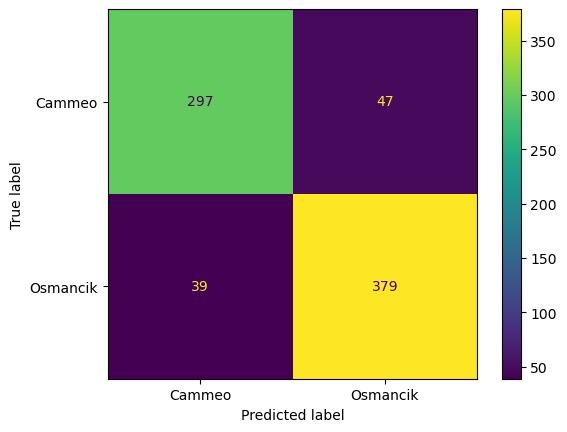

In [856]:
actual = test_dataframe['class'].tolist()
predicted_k1 = KNN_k1
confusion_matrix_k1 = metrics.confusion_matrix(actual, predicted_k1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_k1, display_labels = ['Cammeo', 'Osmancik'])

cm_display.plot()
plt.show()


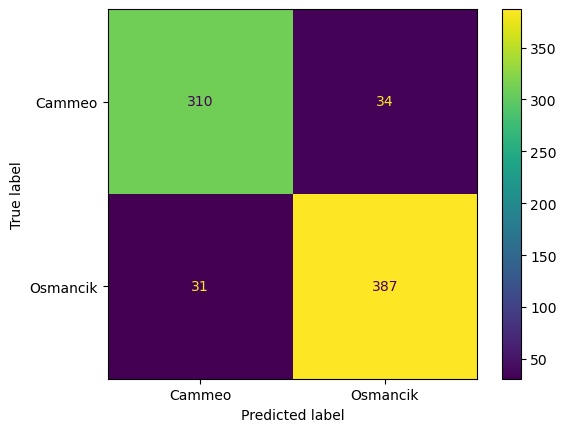

In [857]:
actual = test_dataframe['class'].tolist()
predicted_k5 = KNN_k5
confusion_matrix_k5 = metrics.confusion_matrix(actual, predicted_k5)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_k5, display_labels = ['Cammeo', 'Osmancik'])

cm_display.plot()
plt.show()
